In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime 

In [6]:
orders = pd.read_csv('../data/Orders.csv')

In [102]:
returns = pd.read_csv('../data/Returns.csv')

# Problem1

In [17]:
orders['Profit'] = orders['Profit'].map(lambda s: float(s.replace('$', '').replace(',', ''))*100)

In [18]:
orders['Sales'] = orders['Sales'].map(lambda s: float(s.replace('$', '').replace(',', ''))*100)

# Problem2

In [66]:
orders['Order.Date'] = orders['Order.Date'].map(lambda s: datetime.date(int(s[s.find('/', 3)+1:])+2000,
                                                 int(s[:s.find('/')]),
                                                 int(s[s.find('/')+1:s.find('/', 3)])))

In [157]:
orders['Order.Month'] = orders['Order.Date'].map(lambda date: date.month)

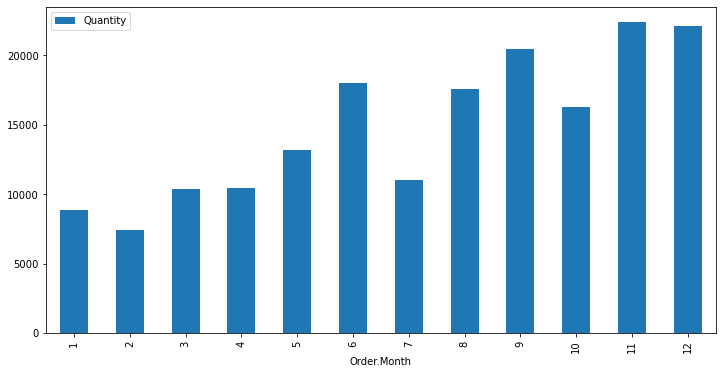

In [160]:
orders.groupby('Order.Month').sum()[['Quantity']].reset_index().plot(x = 'Order.Month', y = 'Quantity', kind = 'bar', figsize = (12, 6));

In [161]:
temp = orders.groupby(['Order.Month', 'Category']).sum()[['Quantity']].reset_index()

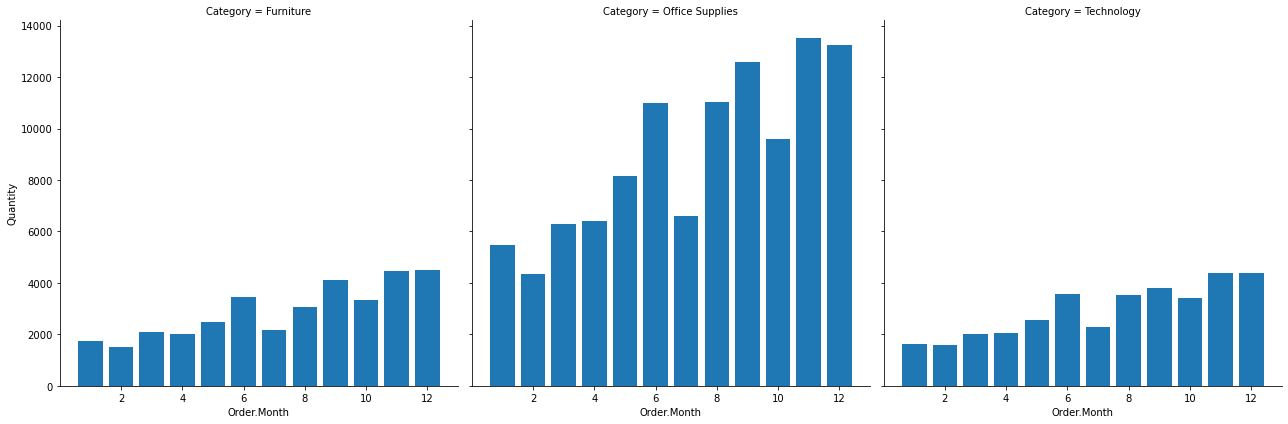

In [166]:
sns.FacetGrid(temp, col = 'Category', height = 6, aspect = 1).map(plt.bar, 'Order.Month', 'Quantity');

# Problem3

In [105]:
merged_df = pd.merge(orders, returns, left_on = 'Order.ID', right_on = 'Order ID')

In [113]:
merged_df['Order.Year'] = merged_df['Order.Date'].map(lambda date: date.year)

In [120]:
merged_df.groupby('Order.Year').sum()[['Profit']]

,Profit
Order.Year,
2012,1747726.0
2013,926989.0
2014,1751063.0
2015,1711297.0


In [128]:
merged_df['Customer.ID'].value_counts()[merged_df['Customer.ID'].value_counts() >= 2].shape[0]

547

In [129]:
merged_df['Customer.ID'].value_counts()[merged_df['Customer.ID'].value_counts() >= 5].shape[0]

80

In [148]:
merged_df.groupby('Region_x').count()[['Order.ID']].sort_values(by = 'Order.ID', ascending = False).head(5)

,Order.ID
Region_x,
Central America,248
Western Europe,233
Western US,177
Oceania,154
Southeastern Asia,140


In [151]:
merged_df.groupby('Category').count()[['Order.ID']].sort_values(by = 'Order.ID', ascending = False)

,Order.ID
Category,
Office Supplies,1348
Technology,445
Furniture,427


In [155]:
merged_df.groupby('Sub.Category').count()[['Order.ID']].sort_values(by = 'Order.ID', ascending = False).head(5)

,Order.ID
Sub.Category,
Binders,269
Art,217
Storage,212
Paper,150
Chairs,147


# Problem4

# Problem5